Standart olan kütüphaneleri import etme, veri setlerini çağırma ve veri setinde gerekli düzenlemeleri yapma işlemlerini gerçekleştirelim.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
median_house_hold_in_come = pd.read_csv("MedianHouseholdIncome2015.csv", encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv("PercentOver25CompletedHighSchool.csv", encoding="windows-1252")
share_race_city = pd.read_csv("ShareRaceByCity.csv", encoding="windows-1252")
kill = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")

In [3]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)

In [4]:
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

Box plot ile çizdirdiğimiz aynı problemi Swarm Plot ile çizdirelim.

Öncelikle x eksenini M ve F şeklinde ayırıyoruz. y eksenine age değerlerini yerleştiriyoruz. Class'larda shot ve shot and Tasered'dir.

C:\Users\raziy\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


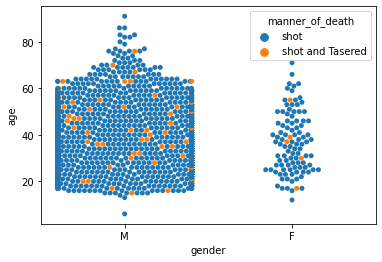

In [5]:
sns.swarmplot(x="gender", y="age",hue="manner_of_death", data=kill)
plt.show()

Yukarıdaki kod bloğunu açıklayalım.

kill veri setini kullanacağımızı son parametre ile belirttim. Bu veri setini artık tanıdığı için gender, age ve manner_of_death sütunlarınıda kullanabiliriz. gender sütunu içerisindeki unique değerleri x eksene yerleştiriyorum. y ekseninede age sütunundaki sayı değerlerini yerleştiriyorum. 

Class'lar manner_of_death sütunundaki farklı öldürme şekilleridir. shot ve shot and Tasered şeklinde 2 adet class vardır.

<font color = 'indigo'>
    
Çıktıyı yorumlayalım.
    
Cinsiyeti erkek (M) olan kısmı inceleyelim. Mavi noktalar vurularak öldürülenleri ifade eder. Vurularak öldürülenler ve şok tabancasıyla öldürülenler turuncu noktalardır. 
    
Şekil üzerinden hangi yaştaki insanın nasıl öldürüldüğünü gözlemleyebiliyoruz. 
    
5 tane kadın (turuncu noktalar) shot and Tasered ölüm şekli ile öldürülmüş. Bu ölüm şekli ile öldürülen sayısı erkeklerde daha fazladır.
    
Mavi ve turuncu noktalar erkeklerde, kadınlara göre çok daha yoğundur. 

Swarm plot'u classification algoritmalarında kullanılır ve data'yı nasıl ayıracağımızı net bir şekilde gösterebilir.

Swarm plot'un bir dezavantajı vardır: 
    🟡 Veri sayısı çok ise mesela 10.000'den fazla ise Swarm plot çizdirmek çok zorlaşacaktır. Bilgisayarınızın hafızası neredeyse %100 çalışacak ama yinede çizdiremeyeceksiniz.